In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data 
y = data.target.reshape(-1,1)

In [3]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [6]:
# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

In [7]:
# Combine features and labels
X = np.hstack((X, y))


In [8]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [9]:
num_visible = X_train.shape[1]
num_hidden = 10 
learning_rate = 0.1 
epochs = 100 

In [10]:
np.random.seed(42)
weights = np.random.randn(num_visible, num_hidden) * 0.1 
hidden_bias = np.zeros(num_hidden)
visible_bias = np.zeros(num_visible)

In [12]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Store loss values for plotting
loss_values = []

# Training RBM using Contrastive Divergence (CD-1) with loss tracking
for epoch in range(epochs):
    for sample in X_train:
        # Positive phase
        hidden_prob = sigmoid(np.dot(sample, weights) + hidden_bias)
        hidden_states = (hidden_prob > np.random.rand(num_hidden)).astype(float)

        # Reconstruct visible layer
        visible_prob = sigmoid(np.dot(hidden_states, weights.T) + visible_bias)
        
        # Negative phase
        hidden_prob_neg = sigmoid(np.dot(visible_prob, weights) + hidden_bias)
        
        # Weight updates
        weights += learning_rate * (np.outer(sample, hidden_prob) - np.outer(visible_prob, hidden_prob_neg))
        visible_bias += learning_rate * (sample - visible_prob)
        hidden_bias += learning_rate * (hidden_prob - hidden_prob_neg)
    
    # Compute loss every epoch
    loss = np.mean((X_train - visible_prob) ** 2)
    loss_values.append(loss)


In [32]:
# Print loss values
print("RBM Loss over Epochs:")
for i, loss in enumerate(loss_values):
    print(f"Epoch {i+1}: Loss = {loss:.4f}")

RBM Loss over Epochs:
Epoch 1: Loss = 0.2634
Epoch 2: Loss = 0.2531
Epoch 3: Loss = 0.2640
Epoch 4: Loss = 0.2649
Epoch 5: Loss = 0.2982
Epoch 6: Loss = 0.2643
Epoch 7: Loss = 0.2615
Epoch 8: Loss = 0.2603
Epoch 9: Loss = 0.2600
Epoch 10: Loss = 0.2608
Epoch 11: Loss = 0.2639
Epoch 12: Loss = 0.2617
Epoch 13: Loss = 0.2601
Epoch 14: Loss = 0.2587
Epoch 15: Loss = 0.2635
Epoch 16: Loss = 0.2635
Epoch 17: Loss = 0.2631
Epoch 18: Loss = 0.2597
Epoch 19: Loss = 0.2599
Epoch 20: Loss = 0.3050
Epoch 21: Loss = 0.3070
Epoch 22: Loss = 0.3012
Epoch 23: Loss = 0.3107
Epoch 24: Loss = 0.2608
Epoch 25: Loss = 0.3079
Epoch 26: Loss = 0.2611
Epoch 27: Loss = 0.3061
Epoch 28: Loss = 0.2577
Epoch 29: Loss = 0.2600
Epoch 30: Loss = 0.2590
Epoch 31: Loss = 0.2630
Epoch 32: Loss = 0.2621
Epoch 33: Loss = 0.2610
Epoch 34: Loss = 0.2579
Epoch 35: Loss = 0.2598
Epoch 36: Loss = 0.2633
Epoch 37: Loss = 0.2617
Epoch 38: Loss = 0.3038
Epoch 39: Loss = 0.2597
Epoch 40: Loss = 0.2613
Epoch 41: Loss = 0.2325
Epo

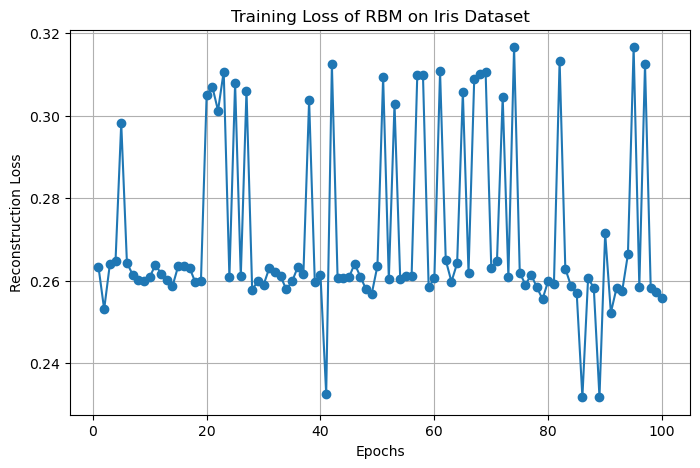

In [33]:
import matplotlib.pyplot as plt

# Plot loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, epochs + 1), loss_values, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Reconstruction Loss")
plt.title("Training Loss of RBM on Iris Dataset")
plt.grid(True)
plt.show()

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [35]:
X = data.data  # Features
y = data.target.reshape(-1, 1)  # Labels

# Normalize features between 0 and 1
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data correctly for 1D CNN
X_train_cnn = X_train.reshape(X_train.shape[0], 4, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 4, 1)


In [36]:
# Build 1D CNN model
cnn_model = keras.Sequential([
    layers.Conv1D(16, 2, activation='relu', input_shape=(4, 1)),
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(3, activation='softmax')
])

c:\Users\keith\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=50, verbose=0, validation_data=(X_test_cnn, y_test))

# Evaluate CNN
cnn_acc = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]


In [ ]:
from sklearn.metrics import accuracy_score





CNN Accuracy: 0.8000


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.argmax(y_train, axis=1))
knn_acc = accuracy_score(np.argmax(y_test, axis=1), knn.predict(X_test))



In [46]:
from sklearn.svm import SVC

In [47]:
# SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train, np.argmax(y_train, axis=1))
svm_acc = accuracy_score(np.argmax(y_test, axis=1), svm.predict(X_test))

In [48]:
print(f"CNN Accuracy: {cnn_acc:.4f}")
print(f"KNN Accuracy: {knn_acc:.4f}")
print(f"SVM Accuracy: {svm_acc:.4f}")

CNN Accuracy: 0.8000
KNN Accuracy: 1.0000
SVM Accuracy: 1.0000
